Bo Yang (Aaron) USCID:7526922531

### INF 552 HOMEWORK_1  Date: 09-15-2019

## (b) Pre-Processing and Exploratory data analysis:

### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1

In [1]:
import numpy as np

CLASS0 = "class 0"
CLASS1 = "class 1"
EPSILON = 1e-8

In [2]:
def load_data(file_path):
    """read records from csv file"""
    row_data = np.genfromtxt(file_path, dtype=None, delimiter=',', encoding='utf-8')[1:]
    X = np.array(row_data[:, :-1], dtype=float)
    Y_row_str_data = row_data[:, row_data.shape[1] - 1]
    y = np.array([1 if x == "Abnormal" else 0 for x in Y_row_str_data])
    return X, y

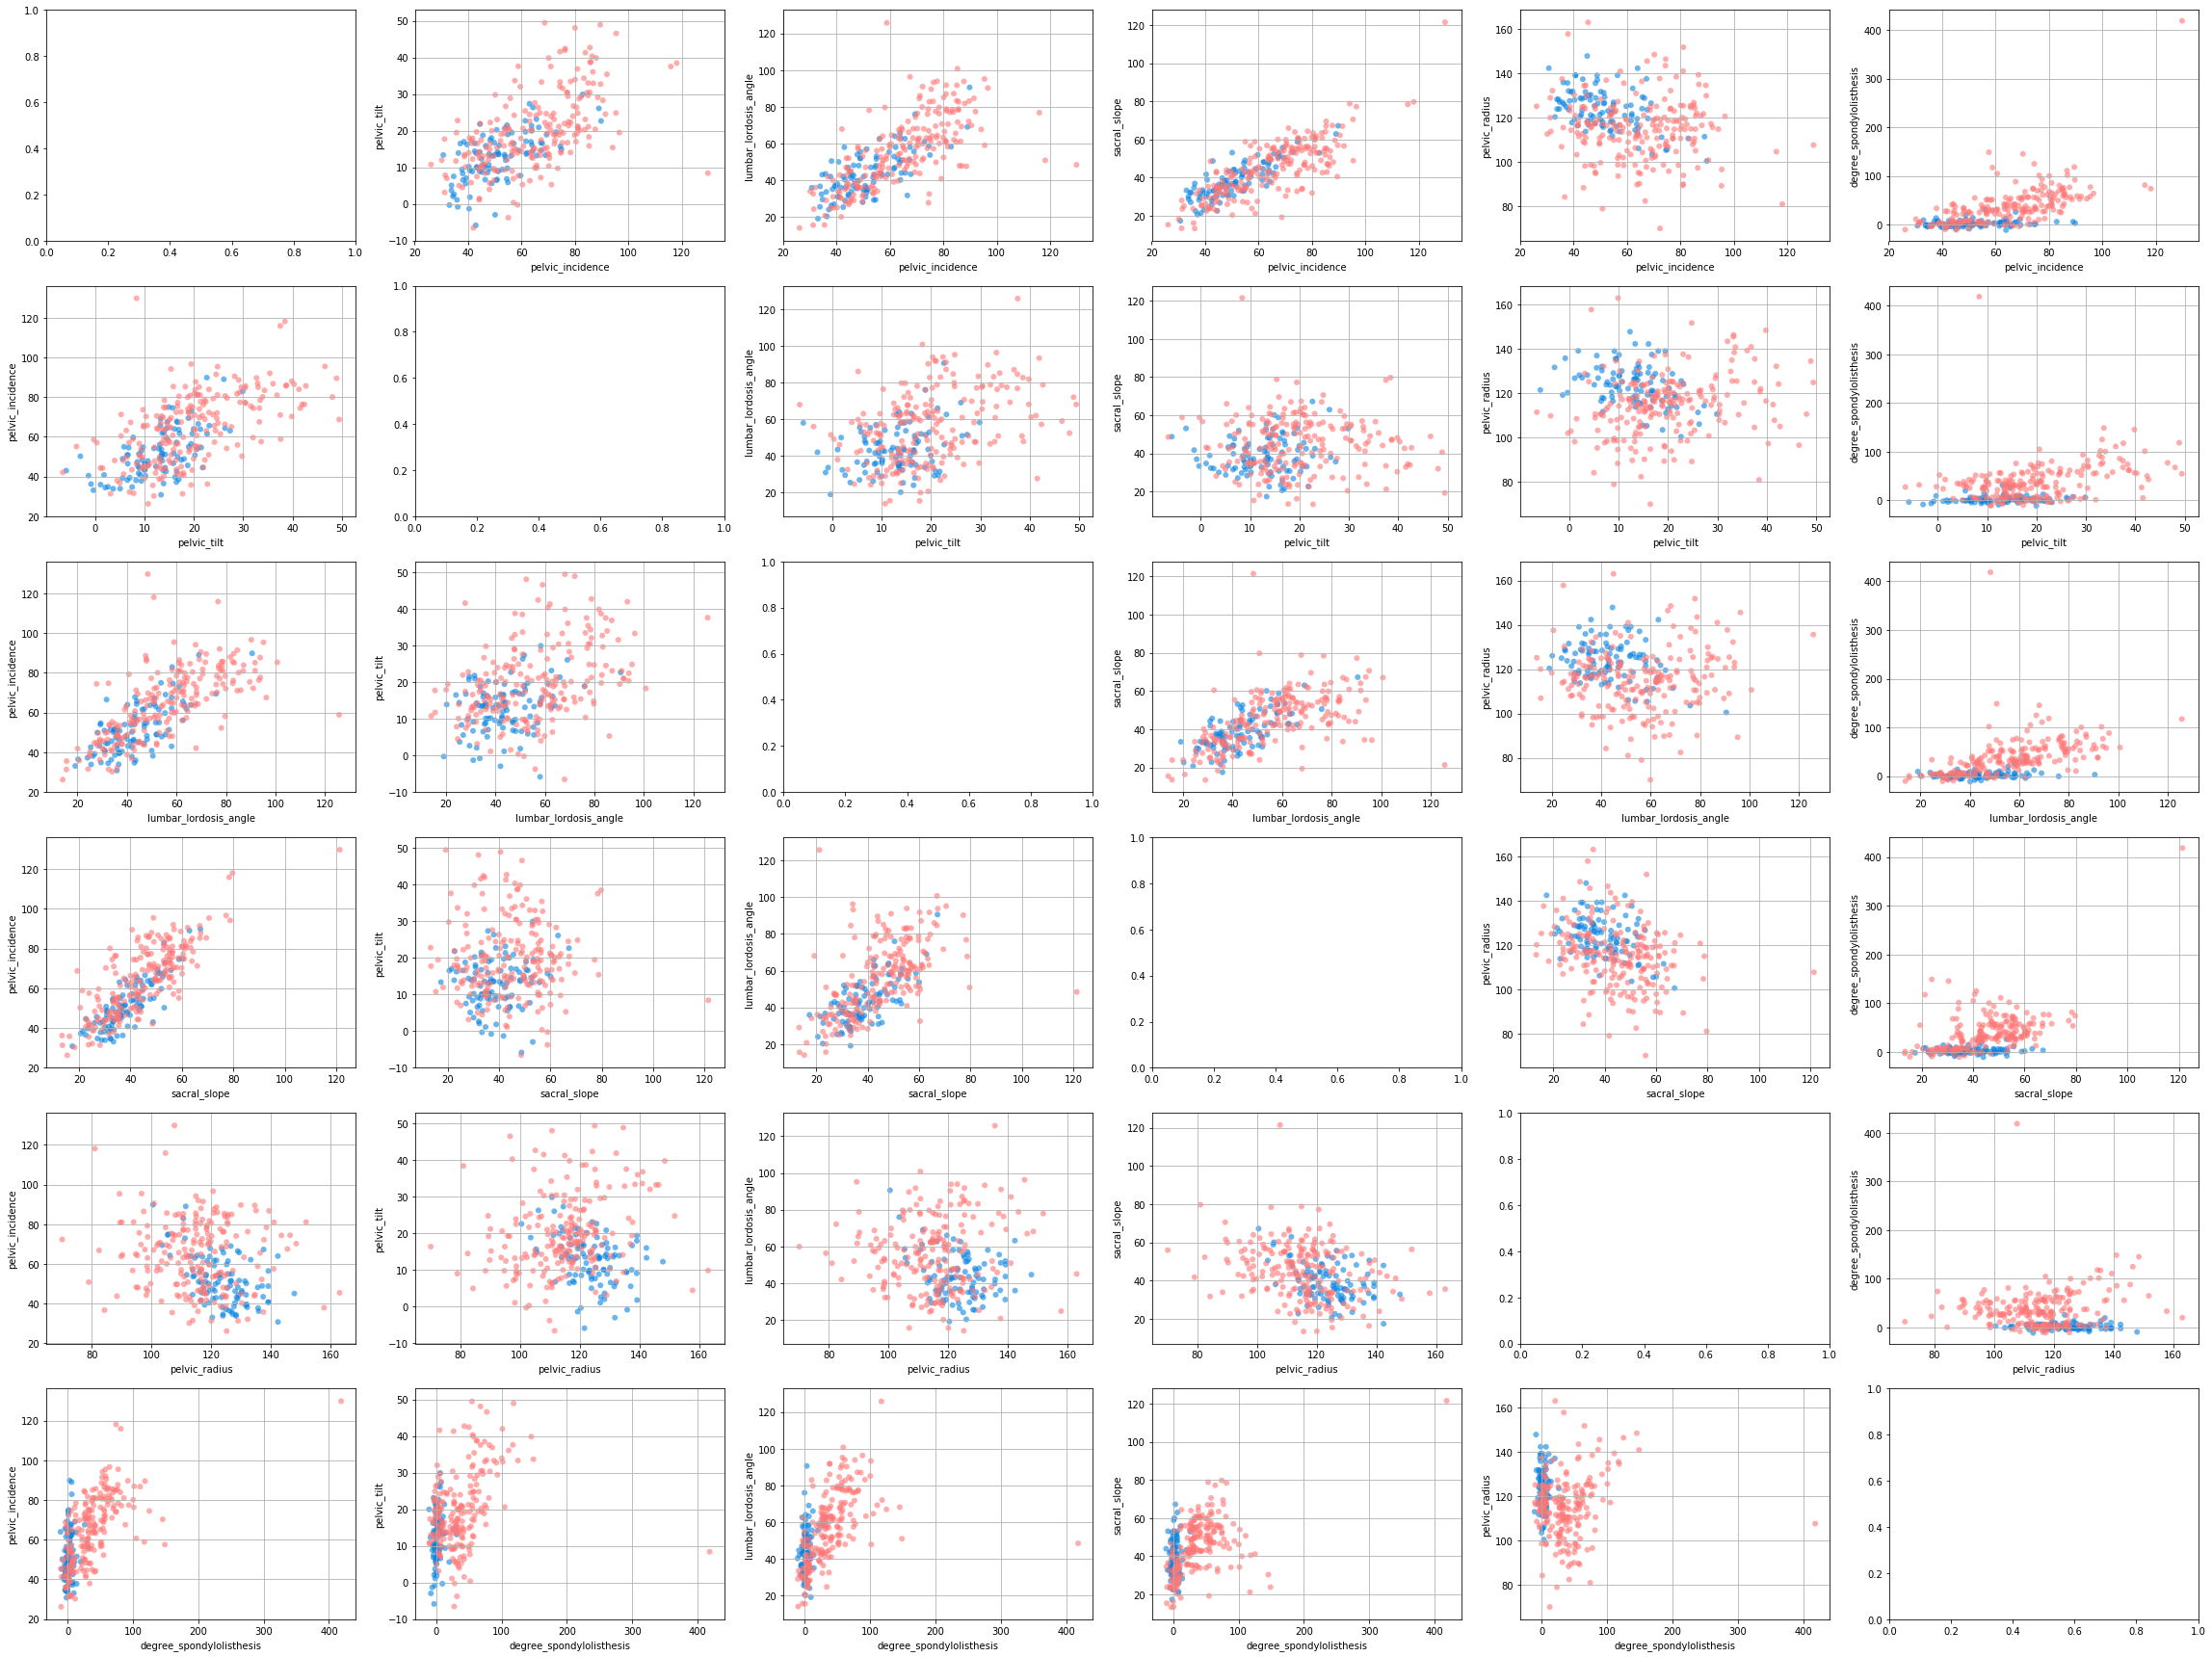

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
X_train, y_train = load_data('./assets/data.csv')

fig, ax = plt.subplots(nrows=6, ncols=6, figsize=(32, 24))
labels = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius',
          'degree_spondylolisthesis']
result = ['Normal', 'Abnormal']


for x_index in range(0, 6):
    for y_index in range(0, 6):
        if (x_index != y_index):
            ax[x_index, y_index].scatter(X_train[y_train == 0, x_index], 
                                         X_train[y_train == 0, y_index],
                                         color='#0984e3', label=result[0], 
                                         alpha=0.6, edgecolors='none')
            ax[x_index, y_index].scatter(X_train[y_train == 1, x_index], 
                                         X_train[y_train == 1, y_index],
                                         color='#ff7675', label=result[1], 
                                         alpha=0.6, edgecolors='none')
            ax[x_index, y_index].set_xlabel(labels[x_index])
            ax[x_index, y_index].set_ylabel(labels[y_index])
            ax[x_index, y_index].grid(True)

        y_index += 1
    x_index += 1

fig.tight_layout()
plt.show()

#### Finding: From the above scatter plots we can see that there are some variables have strong connections, like pelvic_incidence  and sacral_slope. Basically they follow the same trend and the data points displayed in pretty a same area.

### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

The variables boxplots as shown in the next:


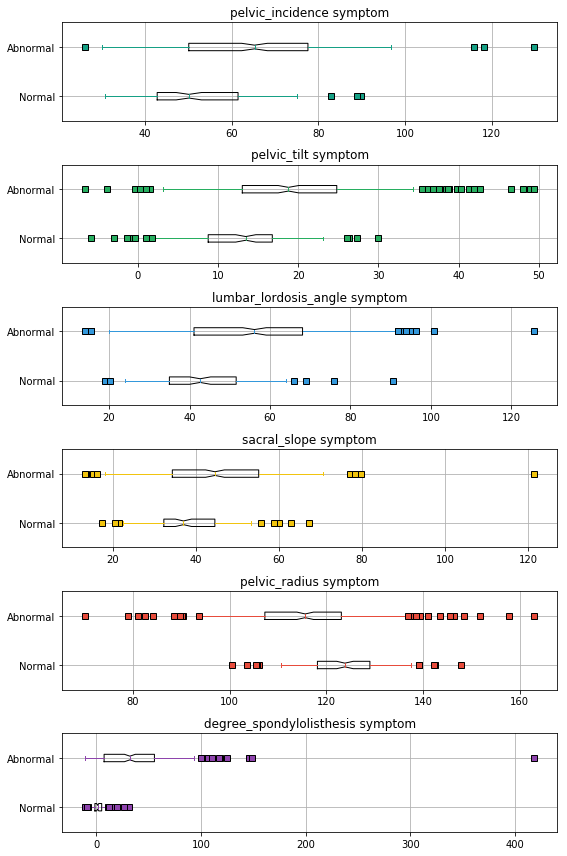

In [5]:
colors = ['#16a085', '#27ae60', '#3498db', '#f1c40f', '#e74c3c', '#8e44ad']
results = ['Normal', 'Abnormal']
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15, 12))

for index in range(0, 6):
    temp = []
    temp.append(X_train[y_train == 0, index])
    temp.append(X_train[y_train == 1, index])
    ax[index, 0].boxplot(temp, labels=results, 
                         flierprops=dict(markerfacecolor=colors[index], marker='s'), 
                         whis=0.85, notch=True, medianprops={'color': colors[index]}, vert=False,
                         whiskerprops={'color': colors[index]}, capprops={'color': colors[index]})
    ax[index, 0].grid(True)
    ax[index, 0].title.set_text(labels[index] + " symptom")
    ax[index, 1].remove()

plt.tight_layout()
print("The variables boxplots as shown in the next:")
plt.show()

#### Finding: From the above box plots, we can see that the range of abnormal variable degree_spondylolisthesis has a great difference compared to the normal situation, implying that this feature could serve as a main role when determining the patients whether has a disease or not.

### iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [6]:
def train_test_by_class_index(X, y, split_info_dict):
	"""According to the dict, split row data into X_train, X_test, y_train, y_test"""
	assert X.shape[0] == y.shape[0], \
		"the size of X must be equal to the size of y"
	assert split_info_dict is not None, \
		"Please initialize a dict with {CLASS0: int, CLASS1: int}"
	
	normal_indexes = (y == 0)
	abnormal_indexes = (y == 1)
	normal_limit = split_info_dict[CLASS0]
	abnormal_limit = split_info_dict[CLASS1]

	'''first 70 rows of class 0'''
	X_data_normal = X[normal_indexes, :][:normal_limit]
	y_data_normal = y[normal_indexes][:normal_limit]

	'''the rest of data in class 0'''
	X_rest_data_normal = X[normal_indexes, :][normal_limit:]
	y_rest_data_normal = y[normal_indexes][normal_limit:]

	'''first 140 rows of class 1'''
	X_data_abnormal = X[abnormal_indexes, :][:abnormal_limit]
	y_data_abnormal = y[abnormal_indexes][:abnormal_limit]
	'''the rest of data in class 1'''
	X_rest_data_abnormal = X[abnormal_indexes, :][abnormal_limit:]
	y_rest_data_abnormal = y[abnormal_indexes][abnormal_limit:]

	'''combine them into one array'''
	X_train = np.concatenate((X_data_normal, X_data_abnormal), axis=0)
	X_test = np.concatenate((X_rest_data_normal, X_rest_data_abnormal), axis=0)

	y_train = np.concatenate((y_data_normal, y_data_abnormal), axis=0)
	y_test = np.concatenate((y_rest_data_normal, y_rest_data_abnormal), axis=0)

	return X_train, X_test, y_train, y_test

In [7]:
X_row_data, Y_row_data = load_data('./assets/data.csv')
print("X_row_data.shape = {}".format(X_row_data.shape))
print("Y_row_data.shape = {}".format(Y_row_data.shape))
print("-------After Process-----")
split_info_dict = {CLASS0: 70, CLASS1: 140}
X_train, X_test, y_train, y_test = \
    train_test_by_class_index(X_row_data, Y_row_data, split_info_dict)

print("X_train.shape = {}".format(X_train.shape))
print("X_test.shape = {}".format(X_test.shape))
print("y_train.shape = {}".format(y_train.shape))
print("y_test.shape = {}".format(y_test.shape))

X_row_data.shape = (310, 6)
Y_row_data.shape = (310,)
-------After Process-----
X_train.shape = (210, 6)
X_test.shape = (100, 6)
y_train.shape = (210,)
y_test.shape = (100,)


## (c) Classification using KNN on Vertebral Column Data Set

### i. Write code for k-nearest neighbors with Euclidean metric

#### I decided to challenge myself by using my own algorithm to finish part of my homework.

In [8]:
def accuracy_score(y_true, y_predict):
	'''compare every single item in each array'''
	assert y_true.shape[0] == y_predict.shape[0], \
		"the shape of y_true need to be identical with y_predict"
	return sum(y_true == y_predict) / len(y_true)

In [9]:
# Aarons KNN algrithm based on Eulidean Distance
from math import sqrt
from collections import Counter

class KNeighborsClassifier:

	def __init__(self, n_neighbors):
		assert n_neighbors >= 1, "n_neighbors must be a valid number"
		self.n_neighbors = n_neighbors
		self._X_train = None
		self._y_train = None

	def fit(self, X_train, y_train):
		assert X_train.shape[0] == y_train.shape[0], ""
		assert self.n_neighbors <= X_train.shape[0], ""
		self._y_train = y_train
		self._X_train = X_train
		return self

	def predict(self, X_test):
		assert self._X_train is not None and self._y_train is not None, ""
		assert X_test.shape[1] == self._X_train.shape[1], ""

		y_predict = [self._predict(x) for x in X_test]
		return np.array(y_predict)

	def _predict(self, x):
		assert x.shape[0] == self._X_train.shape[1], ""
		# Euclidean Distance metric ==> sqrt(sum((x - y)^2))
		distances = [sqrt(np.sum(item - x) ** 2) for item in self._X_train]
		nearest = np.argsort(distances)
		topK_y = [self._y_train[i] for i in nearest[:self.n_neighbors]]
		votes = Counter(topK_y)
		return votes.most_common(1)[0][0]

	def score(self, X_test, y_test):
		y_predict = self.predict(X_test)
		return accuracy_score(y_test, y_predict)

	def __repr__(self):
		return "KNN(n_neighbors = %d)" % self.n_neighbors

In [10]:
# find the best k based on Aaron KNN algorithm
X_row_data, Y_row_data = load_data('./assets/data.csv')

split_info_dict = {CLASS0: 70, CLASS1: 140}

# Aaron's split method
X_train, X_test, y_train, y_test = train_test_by_class_index(X_row_data, Y_row_data, 
                                                             split_info_dict)
        
knn_clf = KNeighborsClassifier(n_neighbors=4)

knn_clf.fit(X_train, y_train)

print("Using my knn algorithm, and I got an accuracy score is {}"
      .format(knn_clf.score(X_test, y_test)))

Using my knn algorithm, and I got an accuracy score is 0.68


### ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for  k ∈ {208, 205, .....7, 4, 1}  (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F-score when k = k∗.

When I titled a pic with my name, it means I used my algorithm, or I use sklearn package


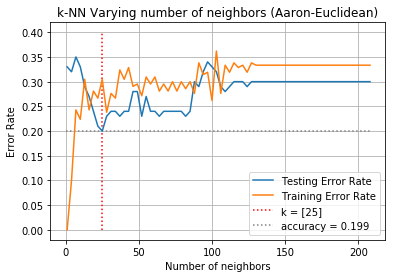

So the best k for my knn is [25]


In [11]:
# find the best k based on Aaron KNN algorithm
X_row_data, Y_row_data = load_data('./assets/data.csv')

split_info_dict = {CLASS0: 70, CLASS1: 140}

# Aaron's split method
X_train, X_test, y_train, y_test = train_test_by_class_index(X_row_data, Y_row_data, 
                                                             split_info_dict)

alternative_k = np.arange(208, 0, -3)
train_accuracy = np.empty(len(alternative_k))
test_accuracy = np.empty(len(alternative_k))

for index, k in enumerate(alternative_k):
    # KNeighborsClassifier based on Euclidean Distance
    knn_clf = KNeighborsClassifier(n_neighbors=k)

    knn_clf.fit(X_train, y_train)

    y_predict = knn_clf.predict(X_test)

    train_accuracy[index] = knn_clf.score(X_train, y_train)

    test_accuracy[index] = knn_clf.score(X_test, y_test)

best_accuracy_ = np.max(test_accuracy)
best_k_ = 208 - (np.reshape(np.argwhere(test_accuracy == best_accuracy_), (1, -1))[0]) * 3
plt.title('k-NN Varying number of neighbors (Aaron-Euclidean)')

plt.plot(alternative_k, 1 - test_accuracy, label='Testing Error Rate')
plt.plot(alternative_k, 1 - train_accuracy, label='Training Error Rate')

plt.vlines(best_k_, 0, 0.4, colors='red', label='k = ' + str(best_k_),linestyles='dotted')
plt.hlines(1 - best_accuracy_, 0, 208, colors='gray', 
           label='accuracy = ' + str(1 - best_accuracy_)[:5], linestyles='dotted')

plt.legend()
plt.grid(True)
plt.xlabel('Number of neighbors')
plt.ylabel('Error Rate')
print("When I titled a pic with my name, it means I used my algorithm, or I use sklearn package")
plt.show()
print("So the best k for my knn is {}".format(best_k_))

#### Findings: The best k I got is 25 when I used my KNN algorithm. I know this answer might differ from people using sklearn package. But it still worth a try, since I am not only known how to use sklearn package but also studied its source code.

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pandas as pd

k = 25
knn_clf = KNeighborsClassifier(n_neighbors=k)
knn_clf.fit(X_train, y_train)
y_predict = knn_clf.predict(X_test)

confusion_matrix(y_test, y_predict)
crosstab = pd.crosstab(y_test, y_predict, rownames=['True'], 
                       colnames=['Predicted'], margins=True)

true_positive = crosstab.loc[[0]].values[0][0]
false_positive = crosstab.loc[[0]].values[0][1]
false_negative = crosstab.loc[[1]].values[0][0]
true_negative = crosstab.loc[[1]].values[0][1]
print("Aaron-KNN-Euclidean Distance k = ", k)
print("-----------------------------------------------------")
print(crosstab)
print("-----------------------------------------------------")

print("true_positive_rate(TPR) = ", true_positive / (true_positive + false_negative))
print("true_negative_rate(TNR) = ", true_negative / (false_positive + true_negative))
print("-----------------------------------------------------")

print(classification_report(y_test, y_predict))

Aaron-KNN-Euclidean Distance k =  25
-----------------------------------------------------
Predicted   0   1  All
True                  
0          14  16   30
1           4  66   70
All        18  82  100
-----------------------------------------------------
true_positive_rate(TPR) =  0.7777777777777778
true_negative_rate(TNR) =  0.8048780487804879
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.47      0.58        30
           1       0.80      0.94      0.87        70

   micro avg       0.80      0.80      0.80       100
   macro avg       0.79      0.70      0.73       100
weighted avg       0.80      0.80      0.78       100



### iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,2 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30 ....., 210} Note: for each N, select your training set by choosing the first └N/3┘ rows of Class 0 and the first N −  └N/3┘ rows of Class 1 in the training set you creatd in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196} This plot is called a Learning Curve

When I titled the pic with sklearn, it means I used sklearn package


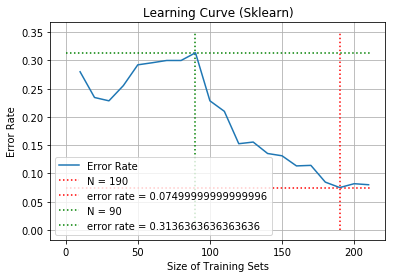

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import math

X_row_data, Y_row_data = load_data('./assets/data.csv')

CLASS0 = "class 0"
CLASS1 = "class 1"

alt_N = np.arange(10, 211, 10)
test_accuracy_temp = np.zeros(21)
for index, N in enumerate(alt_N):
    class0_row_num_ = math.floor(N / 3)
    class1_row_num_ = N - class0_row_num_
    split_info_dict_ = {CLASS0: class0_row_num_, CLASS1: class1_row_num_}
    X_train_, X_test_, y_train, y_test = train_test_by_class_index(X_row_data, Y_row_data, 
                                                                   split_info_dict_)

    for k in np.arange(1, N, 5):
        knn_clf = KNeighborsClassifier(n_neighbors=k)
        knn_clf.fit(X_train_, y_train)
        score = knn_clf.score(X_test_, y_test)

        test_accuracy_temp[index] = score if test_accuracy_temp[index] < score else test_accuracy_temp[index]

test_error_rate_ = np.array([1 - score for score in test_accuracy_temp])

higest_accuracy_rate_ = np.max(test_accuracy_temp)
lowest_accuracy_rate_ = np.min(test_accuracy_temp)
higest_accuracy_N_ = np.argmax(test_accuracy_temp) * 10 + 10
lowest_accuracy_N_ = np.argmin(test_accuracy_temp) * 10 + 10

plt.title('Learning Curve (Sklearn)')
plt.plot(alt_N, test_error_rate_, label='Error Rate')
plt.vlines(higest_accuracy_N_, 0, 0.35, colors='red', 
           label='N = ' + str(higest_accuracy_N_), linestyles='dotted')
plt.hlines(1 - higest_accuracy_rate_, 0, 211, colors='red', 
           label='error rate = ' + str(1 - higest_accuracy_rate_), linestyles='dotted')

plt.vlines(lowest_accuracy_N_, 0, 0.35, colors='green', 
           label='N = ' + str(lowest_accuracy_N_), linestyles='dotted')
plt.hlines(1 - lowest_accuracy_rate_, 0, 211, colors='green', 
           label='error rate = ' + str(1 - lowest_accuracy_rate_),linestyles='dotted')

plt.legend()
plt.grid(True)
plt.xlabel('Size of Training Sets')
plt.ylabel('Error Rate')
print("When I titled the pic with sklearn, it means I used sklearn package")
plt.show()

#### Findings: It is obvious that the error rate was decline when the size of the training set increased. With increasing samples in the model, the following data points in the test set have more evidence to rely on. According to these instances or data points, the KNN algorithm has more chance to predict the class which the new test data should belong to.

## (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when ∈ {1,6,11,...,196}

In [14]:
# Aaron's KNN based on Minkowski Distance
from math import sqrt
from collections import Counter

class KNeighborsClassifier:

	def __init__(self, n_neighbors, p=2):
		assert n_neighbors >= 1, "n_neighbors must be a valid number"
		self.n_neighbors = n_neighbors
		self.p = p
		self._X_train = None
		self._y_train = None

	def fit(self, X_train, y_train):
		assert X_train.shape[0] == y_train.shape[0], ""
		assert self.n_neighbors <= X_train.shape[0], ""
		self._y_train = y_train
		self._X_train = X_train
		return self

	def predict(self, X_test):
		assert self._X_train is not None and self._y_train is not None, ""
		assert X_test.shape[1] == self._X_train.shape[1], ""

		y_predict = [self._predict(x) for x in X_test]
		return np.array(y_predict)

	def _predict(self, x):
		assert x.shape[0] == self._X_train.shape[1], ""
		# Minkowski Distance metric ==> sum(|x - y|^p)^(1/p)
		distances = [np.sum((abs(item - x) ** self.p)) ** (1 / self.p) for item in self._X_train]
		nearest = np.argsort(distances)
		topK_y = [self._y_train[i] for i in nearest[:self.n_neighbors]]
		votes = Counter(topK_y)

		return votes.most_common(1)[0][0]

	def score(self, X_test, y_test):
		y_predict = self.predict(X_test)
		return accuracy_score(y_test, y_predict)

	def __repr__(self):
		return "KNN(n_neighbors = %d)" % self.n_neighbors

### i. Minkowski Distance

####  A. which becomes Manhattan Distance with p = 1.

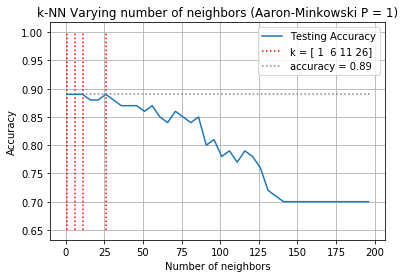

In [15]:
# Test Manhattan Distance when p = 1
X_row_data, Y_row_data = load_data('./assets/data.csv')

split_info_dict = {CLASS0: 70, CLASS1: 140}

# Aaron's split method
X_train, X_test, y_train, y_test = train_test_by_class_index(X_row_data, Y_row_data, 
                                                             split_info_dict)

alternative_k = np.arange(1, 197, 5)
test_accuracy = np.empty(len(alternative_k))

for index, k in enumerate(alternative_k):
    # KNeighborsClassifier based on Aaron's Minkowski Distance
    knn_clf = KNeighborsClassifier(n_neighbors=k, p=1)	# Manhattan Distance

    knn_clf.fit(X_train, y_train)

    y_predict = knn_clf.predict(X_test)

    test_accuracy[index] = knn_clf.score(X_test, y_test)

best_accuracy_ = np.max(test_accuracy)
best_k_ = (np.reshape(np.argwhere(test_accuracy == best_accuracy_), (1, -1))[0]) * 5 + 1

plt.title('k-NN Varying number of neighbors (Aaron-Minkowski P = 1)')
plt.plot(alternative_k, test_accuracy, label='Testing Accuracy')
plt.vlines(best_k_, 0.65, 1, colors='red', label='k = ' + str(best_k_),linestyles='dotted')
plt.hlines(best_accuracy_, 0, 197, colors='gray', 
           label='accuracy = ' + str(best_accuracy_), linestyles='dotted')
plt.legend()
plt.grid(True)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Findings: When I use my own KNN algorithm based on Minkowski distance test the error rate, I got many same k values. To be honest, I don't know which one I should pick. But I know, bias–variance tradeoff, lower bias, higher variance. Finally, I choose the 6 as my answer. (And I also tested other k on the later issue, I found k = 6 can make me get lower error rate. )

#### B. with log10(p) ∈ {0.1, 0.2, 0.3,....,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

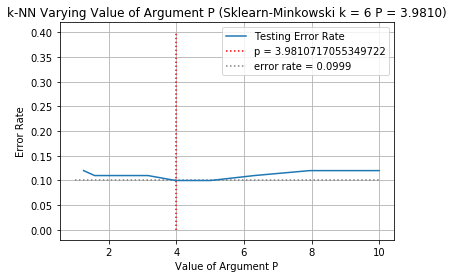

So the best lg(p) I got is when p = 3.9810


In [16]:
alternative_p = [10 ** p for p in np.arange(0.1, 1.1, 0.1)]
test_accuracy = np.empty(len(alternative_p))

for index, p in enumerate(alternative_p):
    # KNeighborsClassifier based on Minkowski Distance
    # in both sk_minkowski_p1_accurancy and minkowski_p1_accurancy pics, the best k = [1 6 11 26]
    knn_clf = KNeighborsClassifier(n_neighbors=6, p=p)

    knn_clf.fit(X_train, y_train)

    y_predict = knn_clf.predict(X_test)

    test_accuracy[index] = knn_clf.score(X_test, y_test)

best_accuracy_ = np.max(test_accuracy)
best_p_ = 10 ** (np.argmax(test_accuracy) * 0.1 + 0.1)

plt.title('k-NN Varying Value of Argument P (Sklearn-Minkowski k = 6 P = {})'.format(str(best_p_)[:6]))
plt.plot(alternative_p, 1 - test_accuracy, label='Testing Error Rate')
plt.vlines(best_p_, 0, 0.4, colors='red', label='p = ' + str(best_p_), linestyles='dotted')
plt.hlines(1 - best_accuracy_, 1, 10, colors='gray', label='error rate = ' + str(1 - best_accuracy_)[:6],
           linestyles='dotted')
plt.legend()
plt.grid(True)
plt.xlabel('Value of Argument P')
plt.ylabel('Error Rate')
plt.show()
print("So the best lg(p) I got is when p = {}".format(str(best_p_)[:6]))

#### C. which becomes Chebyshev Distance with p → ∞

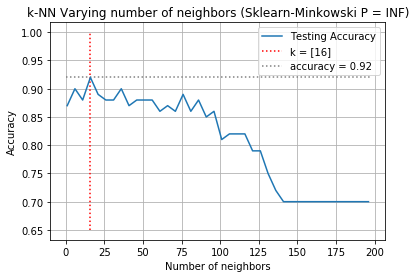

In [17]:
from sklearn.neighbors import KNeighborsClassifier
# Test Minkowski Distance when p = INF
X_row_data, Y_row_data = load_data('./assets/data.csv')

split_info_dict = {CLASS0: 70, CLASS1: 140}

# Aaron's split method
X_train, X_test, y_train, y_test = train_test_by_class_index(X_row_data, Y_row_data, 
                                                             split_info_dict)

alternative_k = np.arange(1, 197, 5)
test_accuracy = np.empty(len(alternative_k))

for index, k in enumerate(alternative_k):
    # KNeighborsClassifier based on Chebyshev Distance
    knn_clf = KNeighborsClassifier(n_neighbors=k, p=float('inf'))

    knn_clf.fit(X_train, y_train)

    y_predict = knn_clf.predict(X_test)

    test_accuracy[index] = knn_clf.score(X_test, y_test)

best_accuracy_ = np.max(test_accuracy)
best_k_ = (np.reshape(np.argwhere(test_accuracy == best_accuracy_), (1, -1))[0]) * 5 + 1

plt.title('k-NN Varying number of neighbors (Sklearn-Minkowski P = INF)')
plt.plot(alternative_k, test_accuracy, label='Testing Accuracy')
plt.vlines(best_k_, 0.65, 1, colors='red', label='k = ' + str(best_k_),linestyles='dotted')
plt.hlines(best_accuracy_, 0, 197, colors='gray', 
           label='accuracy = ' + str(best_accuracy_), linestyles='dotted')
plt.legend()
plt.grid(True)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### ii. Mahalanobis Distance.

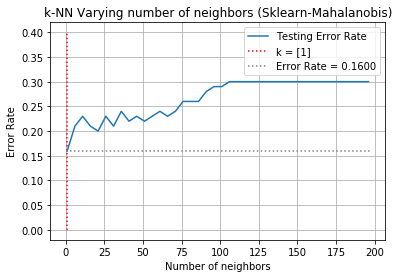

In [18]:
X_row_data, Y_row_data = load_data('./assets/data.csv')

split_info_dict = {CLASS0: 70, CLASS1: 140}

X_train, X_test, y_train, y_test = train_test_by_class_index(X_row_data, Y_row_data, 
                                                             split_info_dict)

#Standardization
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

alternative_k = np.arange(1, 197, 5)
train_accuracy = np.empty(len(alternative_k))
test_accuracy = np.empty(len(alternative_k))

for index, k in enumerate(alternative_k):
    # KNeighborsClassifier based on Mahalanobis Distance.
    knn_clf = KNeighborsClassifier(n_neighbors=k, metric="mahalanobis",
                                   metric_params={'V': np.cov(X_train)}, 
                                   algorithm="brute")

    knn_clf.fit(X_train, y_train)

    test_accuracy[index] = knn_clf.score(X_test, y_test)

best_accuracy_ = np.max(test_accuracy)
best_k_ = (np.reshape(np.argwhere(test_accuracy == best_accuracy_), (1, -1))[0]) * 5 + 1

plt.title('k-NN Varying number of neighbors (Sklearn-Mahalanobis)')
plt.plot(alternative_k, 1 - test_accuracy, label='Testing Error Rate')
plt.vlines(best_k_, 0, 0.4, colors='red', label='k = ' + str(best_k_), linestyles='dotted')
plt.hlines(1 - best_accuracy_, 0, 197, colors='gray', label='Error Rate = ' + str(1 - best_accuracy_)[:6],
           linestyles='dotted')
plt.legend()
plt.grid(True)
plt.xlabel('Number of neighbors')
plt.ylabel('Error Rate')
plt.show()

## (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,...,196}

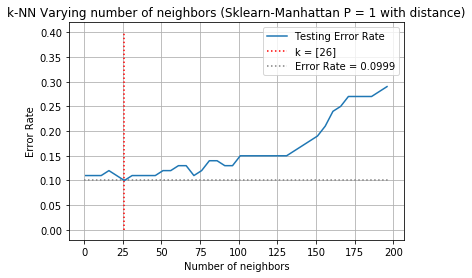

In [19]:
# Test Manhattan Distance when p = 1
X_row_data, Y_row_data = load_data('./assets/data.csv')

split_info_dict = {CLASS0: 70, CLASS1: 140}

X_train, X_test, y_train, y_test = train_test_by_class_index(X_row_data, Y_row_data, 
                                                             split_info_dict)

alternative_k = np.arange(1, 197, 5)
test_accuracy = np.empty(len(alternative_k))

for index, k in enumerate(alternative_k):
    # KNeighborsClassifier based on Manhattan Distance
    knn_clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', 
                                   p=1, weights='distance')
    
    knn_clf.fit(X_train, y_train)

    y_predict = knn_clf.predict(X_test)

    test_accuracy[index] = knn_clf.score(X_test, y_test)

best_accuracy_ = np.max(test_accuracy)
best_k_ = (np.reshape(np.argwhere(test_accuracy == best_accuracy_), (1, -1))[0]) * 5 + 1
# print(best_accuracy)
# print(best_k)
plt.title('k-NN Varying number of neighbors (Sklearn-Manhattan P = 1 with distance)')
plt.plot(alternative_k, 1 - test_accuracy, label='Testing Error Rate')
plt.vlines(best_k_, 0, 0.4, colors='red', label='k = ' + str(best_k_), linestyles='dotted')
plt.hlines(1 - best_accuracy_, 0, 197, colors='gray', 
           label='Error Rate = ' + str(1 - best_accuracy_)[:6], linestyles='dotted')
plt.legend()
plt.grid(True)
plt.xlabel('Number of neighbors')
plt.ylabel('Error Rate')
plt.show()

#### Findings: As we all know, when p = 1, Minkowski Distance is Manhattan. And when p = 2 Minkowski Distance is equal to Euclidean Distance. And when p = inf Minkowski Distance is equal to Chebyshev Distance.

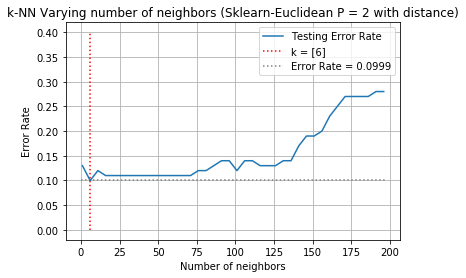

In [20]:
# Test Euclidean Distance when p = 2
X_row_data, Y_row_data = load_data('./assets/data.csv')

split_info_dict = {CLASS0: 70, CLASS1: 140}

X_train, X_test, y_train, y_test = train_test_by_class_index(X_row_data, Y_row_data, 
                                                             split_info_dict)

alternative_k = np.arange(1, 197, 5)
test_accuracy = np.empty(len(alternative_k))

for index, k in enumerate(alternative_k):
    # KNeighborsClassifier based on Euclidean Distance
    knn_clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', 
                                   p=2, weights='distance')

    knn_clf.fit(X_train, y_train)

    y_predict = knn_clf.predict(X_test)

    test_accuracy[index] = knn_clf.score(X_test, y_test)

best_accuracy_ = np.max(test_accuracy)
best_k_ = (np.reshape(np.argwhere(test_accuracy == best_accuracy_), (1, -1))[0]) * 5 + 1
# print(best_accuracy)
# print(best_k)
plt.title('k-NN Varying number of neighbors (Sklearn-Euclidean P = 2 with distance)')
plt.plot(alternative_k, 1 - test_accuracy, label='Testing Error Rate')
plt.vlines(best_k_, 0, 0.4, colors='red', label='k = ' + str(best_k_), linestyles='dotted')
plt.hlines(1 - best_accuracy_, 0, 197, colors='gray', 
           label='Error Rate = ' + str(1 - best_accuracy_)[:6], linestyles='dotted')
plt.legend()
plt.grid(True)
plt.xlabel('Number of neighbors')
plt.ylabel('Error Rate')
plt.show()

#### Findings: When we choose a different way to measure the distance, we got the different best k value. And also I think to take distance weight into consideration is necessary. Imagining when a test data point is surrounded by three different classes data points, normal knn without distance weight will randomly classify this test data point into one of three classes. But when you use distance weight to make predictions, you could make a better choice after you compute each data distance between them.

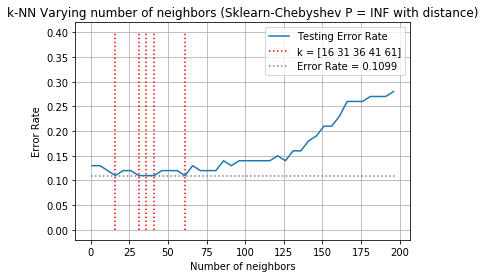

In [21]:
# Test Manhattan Distance when p = 1
X_row_data, Y_row_data = load_data('./assets/data.csv')

split_info_dict = {CLASS0: 70, CLASS1: 140}

X_train, X_test, y_train, y_test = train_test_by_class_index(X_row_data, Y_row_data, 
                                                             split_info_dict)

alternative_k = np.arange(1, 197, 5)
test_accuracy = np.empty(len(alternative_k))

for index, k in enumerate(alternative_k):
    # KNeighborsClassifier based on Chebyshev Distance
    knn_clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', 
                                   p=float('inf'), weights='distance')

    knn_clf.fit(X_train, y_train)

    y_predict = knn_clf.predict(X_test)

    test_accuracy[index] = knn_clf.score(X_test, y_test)

best_accuracy_ = np.max(test_accuracy)
best_k_ = (np.reshape(np.argwhere(test_accuracy == best_accuracy_), (1, -1))[0]) * 5 + 1
# print(best_accuracy)
# print(best_k)
plt.title('k-NN Varying number of neighbors (Sklearn-Chebyshev P = INF with distance)')
plt.plot(alternative_k, 1 - test_accuracy, label='Testing Error Rate')
plt.vlines(best_k_, 0, 0.4, colors='red', label='k = ' + str(best_k_), linestyles='dotted')
plt.hlines(1 - best_accuracy_, 0, 197, colors='gray', 
           label='Error Rate = ' + str(1 - best_accuracy_)[:6], linestyles='dotted')
plt.legend()
plt.grid(True)
plt.xlabel('Number of neighbors')
plt.ylabel('Error Rate')
plt.show()

## (f) What is the lowest training error rate you achieved in this homework?

#### Answer: The lowest training error rate I got is 0